In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/ruth/Downloads/phrasee_ml_data.tsv',sep="\t",names=['company','subject'])

In [3]:
df

,company,subject
0,WayKay,🙉 Make some great memories with 10 off your ro...
1,WayKay,💏 Don't miss 10 off your romantic villa - ever...
2,WayKay,😎 It's time to unwind... We thought you'd like...
3,WayKay,LOVE Black Friday savings? Travel does you a w...
4,WayKay,Get away from it all! 10 off your romantic vil...
...,...,...
39995,Fashionista,🌜 Let's party! Your next night out(fit)...
39996,Fashionista,😻 The fashion you need at prices you'll LOVE.
39997,Fashionista,WOW... Sparkle this party season
39998,Fashionista,Soirée style... Be the belle of the ball.


In [4]:
pd.isnull(df).sum()

company    0
subject    0
dtype: int64

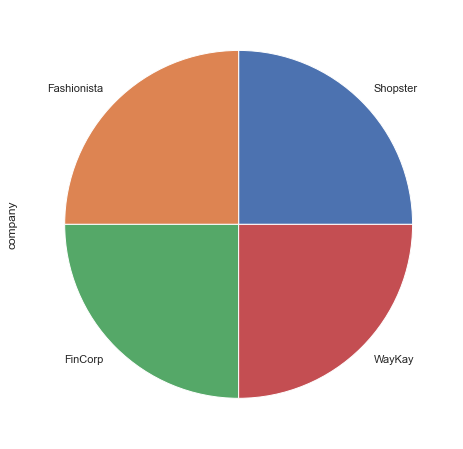

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
f = plt.figure(figsize=(20,8))
sn.set(style='darkgrid')
df['company'].value_counts().plot(kind="pie")
plt.show()

In [6]:
title_df = df

# removing everything except alphabets`
title_df['clean_doc'] = title_df['subject'].str.replace("[^a-zA-Z#]", " ")

# removing short words
title_df['clean_doc'] = title_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercasetitle_df['clean_doc'] = title_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-6-99d4d88f30d7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  title_df['clean_doc'] = title_df['subject'].str.replace("[^a-zA-Z#]", " ")


In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = title_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(title_df['clean_doc'])

X.shape # check shape of the document-term matrix

(40000, 941)

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(title_df['subject'], title_df['company'],test_size=0.3, random_state=1)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sn.set() # use seaborn plotting style

In [14]:
from sklearn.model_selection import cross_val_score

# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
scores = cross_val_score(model, X_train, y_train, cv=5)
scores
# Train the model using the training data
model.fit(X_train,y_train)
# Predict the categories of the test data
predicted_categories = model.predict(X_test)

In [15]:
print(scores)

[0.97714286 0.97642857 0.97857143 0.97303571 0.97910714]


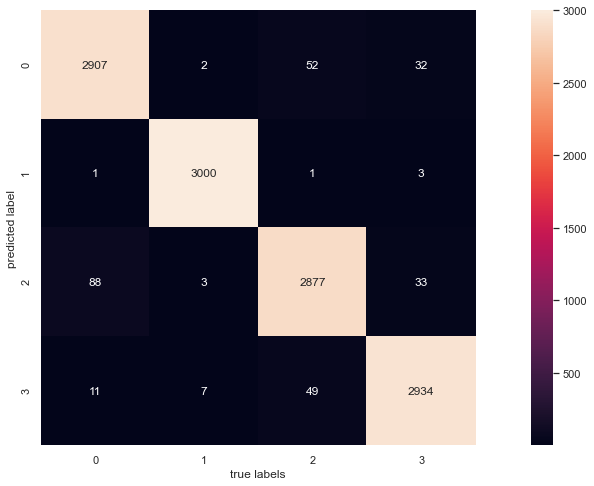

The accuracy is 0.9765


In [16]:
# plot the confusion matrix
f = plt.figure(figsize=(20,8))
mat = confusion_matrix(y_test, predicted_categories)
sn.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))